Adaptive basis-function Model (ABM) has the form

$$f(x) = w_0 + \sum_{m=1}^{M}w_m\phi_m(x)$$

where $\phi_m$ is the $m^{th}$ basis function learned from the data

# Classification & Regression Trees

The model is of the following form

$$f(x) = E[y|x] = \sum_{m=1}^M w_m \mathbb{I}(x \in R_m) = \sum_{m=1}^Mw_m\phi_m(x'v_m)$$

where $R_m$ is the $m^{th}$ region $w_m$ is the mean response of the region and $v_m$ encodes the choice of variable to split on and threshold value on path from the root to the $m^{th}$ leaf

CART is an ABM where basis functions define the regions and weights specify the respose value in each region. When classifying store the distribution over class labels in each leaf instead of the mean response.

E.G see figure 16.1

# Growing A Tree

optimal partitioning is np complete so it's common to use a greedy procedure to compute locally optimal MLE. The split function choose best feature and best value for the feature by

$$(j^*,t^*) = argmin_{j \in \{1 \cdots D\}} \; min_{t \in \tau_j}\; cost(\{x_i,y_i :x_{ij} \leq t \}) + cost(\{x_i,y_i : x_{ij} >t\})  $$

its assumed all inputs are real valued or ordinal so we can compare feature $x_{ij}$ to a numeric value $t$ the set of all possible thresholds $\tau_j$ for feature $j$ is obtained by sorting uniq values of $x_{ij}$ E.G if feature one has values $\{4.5,-12,72,-12\}$ then $\tau_1 = \{-12,4.5,72\}$

for categorical inputs consider splits of form $x_{ij} = c_k$ and $x_{ij} \neq c_x$ for each class label $c_k$. note: could do multiway splits but often this leads to too little data in each subtree and thus overfitting

Heuristics for checking if a node is worth fitting

1. is the reduction in cost too small, typically the gain of using a feature is a normalized measure of the reduction in cost

$$\Delta \triangleq cost(D) - \left(\frac{|D_L|}{|D|}\;cost(D_L) + \frac{|D_R|}{D} \; cost(D_R)\right)$$

2. has to tree exceeded maximum desired depth
3. is the distribution of the response in either $D_L$ or $D_k$ sufficiently homogenous EG all labels are the same
4. is the number of examples in either $D_L$ or $D_k$ too small


## Regression Cost

$$cost(D) = \sum_{i \in D} (y_i - \bar{y})$$

you could also fit a linreg model for each leaf using as inputs the features that were chosen on the path from the root then measure residual error

## Classification Cost

to measure quality of a split fit a multinouli model on leaf satisfying test $ X_j <t$ by estimating class conditional probabilities

$$\hat{\pi} = \frac{1}{|D|} \sum_{i \in D} \; \mathbb{I}(y_i = c)$$
where $D$ is the data in the leaf

common error measures for evaluating a parititon
1. missclassification rate define most probable class label as $\hat{y_c}= argmax_c \hat{\pi_c}$ then the error rate is

$$\frac{1}{|D|} \sum_{i \in D} \mathbb{I} (y_i \neq \hat{y}) = 1-\hat{\pi}_{\hat{y}}$$

2. entropy or deviance

$$\mathbb{H}(\hat{\pi}) = -\sum_{c=1}^{C} \hat{\pi_c}log(\hat{\pi_c})$$

minimizing entropy maximizes information gain

3. Gini Index

$$\sum_{c=1}^C \hat{\pi_c}(1-\hat{\pi_c}) = 1-\sum_c \hat{\pi_c}^2$$ where $\hat{\pi_c}$ is the pobability a random entry in a leaf belongs to class $c$


## Pruning a Tree
grow a full tree then prune it, to determine how far back to prune evaluate cross-validated error on each subtree then pick the tree whose CV error is within 1 SD of the minimum

## Random Forests

one way to reduce variance is to average many estimates for example grow $M$ different trees on different subsets of the data chose randomly with replacement then compute ensemble

$$fx) = \sum_{m=1}^M \frac{1}{M} f_m(x)$$ where $f_m$ is the $m^{th}$ tree this is known as bagging

runing same leaerning on different subsets results in highly correlated predictors that limits that possible variance reduction. random forests tries to decorrelate base learners by learning trees based on randomly chosen subset of input variables as well as randomly chosen subset of data cases.

In [1]:
#data import
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split



#load dataset convert to df
iris = datasets.load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

#set features labes train test split
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [2]:
#fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [3]:
#test accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


In [4]:
#make prediction
species_idx = rfc.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

'virginica'

No handles with labels found to put in legend.


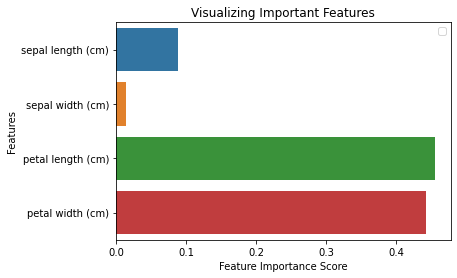

In [5]:
#look at feature importance
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(rfc.feature_importances_,index=iris.feature_names)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()